# Adventure Works Cycles - Analysis of Drop in Profit

In [1]:
#loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
#pandas global seetings

pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:f}'.format)

In [3]:
#data load
df = pd.read_csv('adventure_works_purchase_orders.tar.gz', compression="gzip", header=0, sep=",")

In [4]:
df.head()

,adventure_works_purchase_orders.csv,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
0,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.094400,3374.990000,0.000000,1,51.341500
1,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.094400,3374.990000,0.000000,3,51.341500
2,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.094400,3374.990000,0.000000,1,51.341500
3,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.154400,3399.990000,0.000000,1,51.341500
4,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.154400,3399.990000,0.000000,1,51.341500


In [5]:
#Renaming the 1st Column
df = df.rename(columns={'adventure_works_purchase_orders.csv': 'SalesOrderNumber'})
df.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
0,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.094400,3374.990000,0.000000,1,51.341500
1,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.094400,3374.990000,0.000000,3,51.341500
2,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.094400,3374.990000,0.000000,1,51.341500
3,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.154400,3399.990000,0.000000,1,51.341500
4,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.154400,3399.990000,0.000000,1,51.341500


In [6]:
#unique countries in the dataset
df['Sales_Region'].unique()

array(['United States', 'France', 'Germany'], dtype=object)

In [7]:
#unique order months in the dataset
df['OrderDate'].unique()

array(['7/1/05', '8/1/05', '9/1/05', '10/1/05', '11/1/05', '12/1/05',
       '1/1/06', '2/1/06', '3/1/06', '4/1/06', '5/1/06', '6/1/06',
       '7/1/06', '8/1/06', '9/1/06', '10/1/06', '11/1/06', '12/1/06',
       '1/1/07', '2/1/07', '3/1/07', '4/1/07', '5/1/07', '6/1/07',
       '7/1/07', '8/1/07', '9/1/07', '10/1/07', '11/1/07', '12/1/07',
       '1/1/08', '2/1/08', '3/1/08', '3/31/08', '4/1/08', '5/1/08',
       '6/1/08'], dtype=object)

In [8]:
df[df["OrderDate"] == '3/31/08']

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
37045,SO67202,3/31/08,00:00.0,00:00.0,Rachel Valdez,Germany,Hamburg,Berlin,14111,AW00029745,Versatile Sporting Goods Company,Germany,Nordrhein-Westfalen,Braunschweig,38001,95166,Components,Road Frames,"LL Road Frame - Red, 48",FR-R38R-48,187.157100,337.220000,0.000000,1,6.238600


In [9]:
df[df["Sales_Region"] == 'Germany']

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
37045,SO67202,3/31/08,00:00.0,00:00.0,Rachel Valdez,Germany,Hamburg,Berlin,14111,AW00029745,Versatile Sporting Goods Company,Germany,Nordrhein-Westfalen,Braunschweig,38001,95166,Components,Road Frames,"LL Road Frame - Red, 48",FR-R38R-48,187.157100,337.220000,0.000000,1,6.238600


In [10]:
# Removing the outlier data with date 3/31/08 which is also the only entry for Germany from this analysis
df = df[df["OrderDate"] != '3/31/08'].reset_index(drop=True)

In [11]:
# Converting OrderDate Column in datetime format
df['OrderDate'] = pd.to_datetime(df.OrderDate)

In [12]:
df.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,Customer_Name,Customer_Region,Customer_Province,Customer_City,Customer_Postal_Code,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
0,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.094400,3374.990000,0.000000,1,51.341500
1,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.094400,3374.990000,0.000000,3,51.341500
2,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.094400,3374.990000,0.000000,1,51.341500
3,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.154400,3399.990000,0.000000,1,51.341500
4,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,Better Bike Shop,United States,Georgia,Austell,30106,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.154400,3399.990000,0.000000,1,51.341500


In [13]:
# Calculating Revenue, Cost, Profit, Discount, Freight Cost by adding extra columns
# We also assume that for this analysis FreightCost is extra and is borne entirely by the customers

def revenue_calculation(row):
    if (row['UnitPriceDiscount'] == 0):
        return row['UnitPrice'] * row['OrderQty']
    else:
        return (row['UnitPrice'] * (1 - row['UnitPriceDiscount'])) * row['OrderQty']

df['Revenue'] = df.apply(lambda row: revenue_calculation(row), axis = 1)

df['Cost'] = df['Unit_Cost'] * df['OrderQty']

df['Profit'] = df['Revenue'] - df['Cost']

df['FreightCost'] = df['Unit_Freight_Cost'] * df['OrderQty']

### Analysis

In [14]:
#Dataframe with monthly level metrics

df_monthly = df.groupby(['OrderDate']).agg({'Profit': 'sum',
                                           'Revenue': 'sum',
                                           'Cost': 'sum',
                                           'FreightCost': 'sum',
                                           'SalesOrderNumber': 'nunique',
                                           'OrderQty': 'sum',
                                           'Customer_Code': 'nunique',
                                           'Sales_Person': 'nunique'}).reset_index()

df_monthly['AvgOrderValue'] = df_monthly['Revenue'] / df_monthly['SalesOrderNumber']
df_monthly['AvgCostPerOrder'] = df_monthly['Cost'] / df_monthly['SalesOrderNumber']
df_monthly['AvgProfitPerOrder'] = df_monthly['Profit'] / df_monthly['SalesOrderNumber']
df_monthly['AvgFreightCostPerOrder'] = df_monthly['FreightCost'] / df_monthly['SalesOrderNumber']

df_monthly.head()

,OrderDate,Profit,Revenue,Cost,FreightCost,SalesOrderNumber,OrderQty,Customer_Code,Sales_Person,AvgOrderValue,AvgCostPerOrder,AvgProfitPerOrder,AvgFreightCostPerOrder
0,2005-07-01,265753.320300,638871.550000,373118.229700,27240.518000,31,594,31,7,20608.759677,12036.071926,8572.687752,878.726387
1,2005-08-01,883417.361500,2077746.372800,1194329.011300,113769.702800,54,1566,54,8,38476.784681,22117.203913,16359.580769,2106.846348
2,2005-09-01,692684.111700,1633579.272200,940895.160500,80640.193100,48,1236,48,7,34032.901504,19601.982510,14430.918994,1680.004023
3,2005-10-01,431376.220900,1041946.335000,610570.114100,52625.107000,33,875,33,7,31574.131364,18502.124670,13072.006694,1594.700212
4,2005-11-01,1389113.817700,3301062.767000,1911948.949300,185718.050900,67,2352,67,8,49269.593537,28536.551482,20733.042055,2771.911207


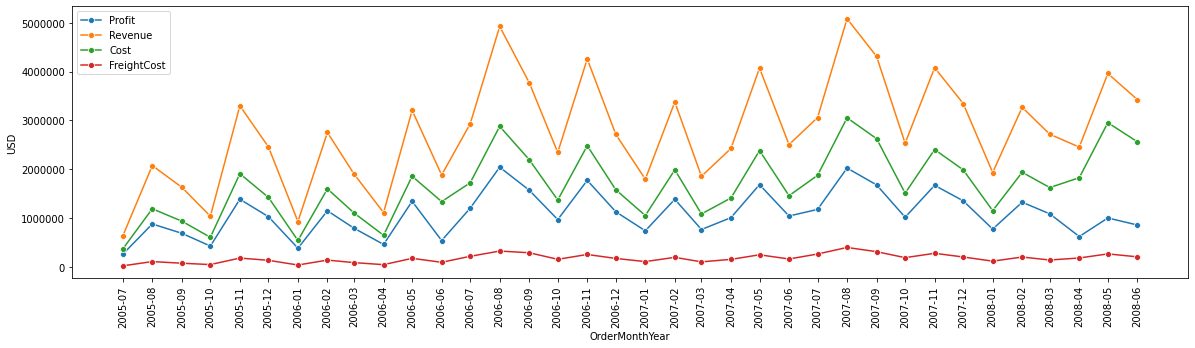

In [15]:
#Plotting Revenue, Cost & Profit over the given time period
plt.figure(figsize=(20,5))
plt.ticklabel_format(style='plain', axis='y')
           
ax = sns.lineplot(x='OrderDate', 
                  y='Profit', 
                  marker='o',
                  data=df_monthly,
                  label='Profit')

ax2 = sns.lineplot(x='OrderDate', 
                   y='Revenue',
                   marker='o',
                   data=df_monthly,
                   label='Revenue')

ax3 = sns.lineplot(x='OrderDate', 
                   y='Cost', 
                   marker='o',
                   data=df_monthly,
                   label="Cost")

ax4 = sns.lineplot(x='OrderDate', 
                   y='FreightCost',
                   marker='o',
                   data=df_monthly,
                   label='FreightCost')

ax.set(xticks=df_monthly['OrderDate'].unique())

ax.set_ylabel('USD')    
ax.set_xlabel('OrderMonthYear')

plt.xticks(rotation=90)
myFmt = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(myFmt)

plt.legend()
#plt.savefig('/Users/sdas/Downloads/plot.png', dpi=300, bbox_inches='tight')
plt.show()

From the above ther is a drop in revenue from 08-2007. During the period the cost has also increased while revenue remained the same. The drop in profit is not gradual, there are some peaks which suggest that seasonality has the role to play in this.

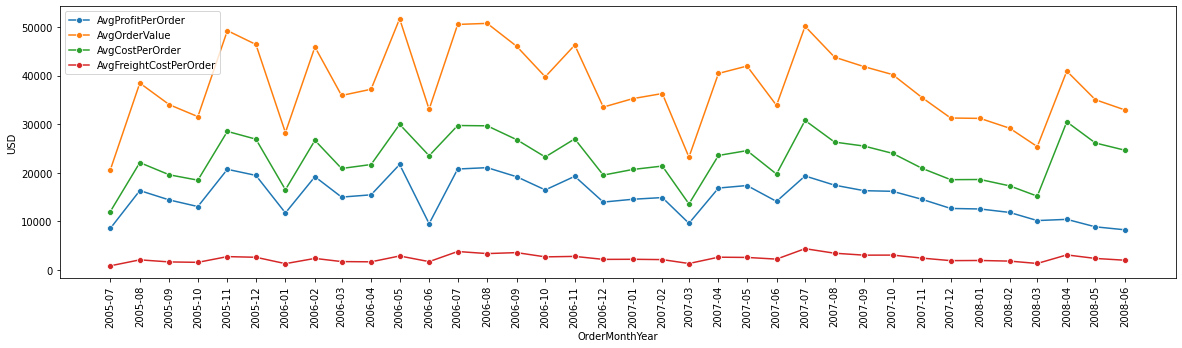

In [16]:
#Plotting Avg Revenue, Cost & Profit over the given time period
plt.figure(figsize=(20,5))
plt.ticklabel_format(style='plain', axis='y')
           
ax = sns.lineplot(x='OrderDate', 
                  y='AvgProfitPerOrder', 
                  marker='o',
                  data=df_monthly,
                  label='AvgProfitPerOrder')

ax2 = sns.lineplot(x='OrderDate', 
                   y='AvgOrderValue',
                   marker='o',
                   data=df_monthly,
                   label='AvgOrderValue')

ax3 = sns.lineplot(x='OrderDate', 
                   y='AvgCostPerOrder', 
                   marker='o',
                   data=df_monthly,
                   label="AvgCostPerOrder")

ax4 = sns.lineplot(x='OrderDate', 
                   y='AvgFreightCostPerOrder',
                   marker='o',
                   data=df_monthly,
                   label='AvgFreightCostPerOrder')

ax.set(xticks=df_monthly['OrderDate'].unique())

ax.set_ylabel('USD')    
ax.set_xlabel('OrderMonthYear')

plt.xticks(rotation=90)
myFmt = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(myFmt)

plt.legend()

#plt.savefig('/Users/sdas/Downloads/plot.png', dpi=300, bbox_inches='tight')

plt.show()

From this graph we can clearly see that profit per order shows a gradual decrease from 08-2007. Again the cost per order has increase while revenue per order (avg  order value) has not changed a lot resulting in decreased profit.

In [17]:
#Dataframe with monthly & country level metrics
df_monthlyByRegion = df.groupby(['OrderDate', 'Sales_Region']).agg({'Profit': 'sum',
                                                                           'Revenue': 'sum',
                                                                           'Cost': 'sum',
                                                                           'SalesOrderNumber': 'nunique',
                                                                           'OrderQty': 'sum',
                                                                           'Customer_Code': 'nunique',
                                                                           'Sales_Person': 'nunique'}).reset_index()
df_monthlyByRegion['AvgProfitPerOrder'] = df_monthlyByRegion['Profit'] / df_monthlyByRegion['SalesOrderNumber']

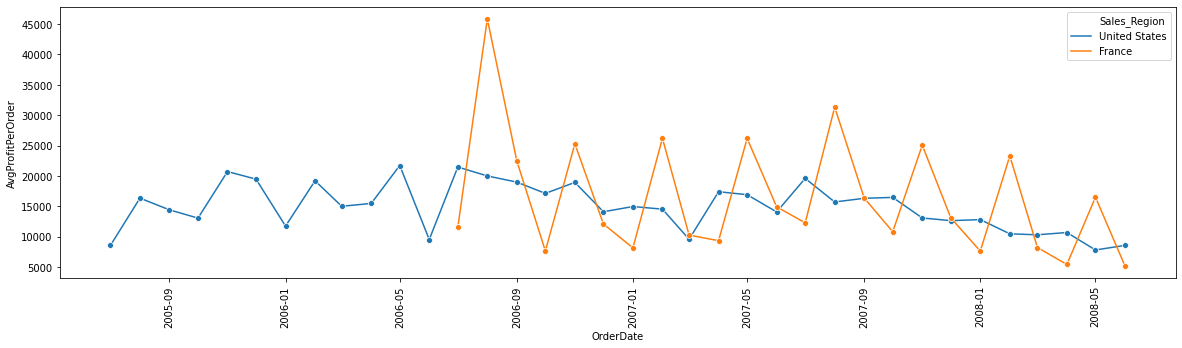

In [18]:
#Plotting the Avg Profit per Order for the  given time period by countries
plt.figure(figsize=(20,5))
plt.ticklabel_format(style='plain', axis='y')
ax2 = sns.lineplot(x='OrderDate', 
                   y='AvgProfitPerOrder',
                   marker='o',
                   hue='Sales_Region',
                  data=df_monthlyByRegion)

ax.set(xticks=df_monthlyByRegion['OrderDate'].unique())
myFmt = mdates.DateFormatter('%m-%y')
ax.xaxis.set_major_formatter(myFmt)

ax.set_ylabel("AvgProfitPerOrder")    
ax.set_xlabel('OrderMonthYear')

plt.xticks(rotation=90)
myFmt = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(myFmt)

#plt.savefig('/Users/sdas/Downloads/plot.png', dpi=300, bbox_inches='tight')
plt.show()


From the above graph, if can be made out that the average profit per order per month decreased gradually  since Aug-2017 for US and for France there is a strong seasonality effect with highs and lows

In [19]:
#Dataframe with monthly & Product Category level metrics
df_monthlyByCategory = df.groupby(['OrderDate', 'Product_Category']).agg({'Profit': 'sum',
                                                                           'Revenue': 'sum',
                                                                           'Cost': 'sum',
                                                                           'SalesOrderNumber': 'nunique',
                                                                           'OrderQty': 'sum',
                                                                           'Customer_Code': 'nunique',
                                                                           'Sales_Person': 'nunique'}).reset_index()
df_monthlyByCategory['AvgProfitPerOrder'] = df_monthlyByCategory['Profit'] / df_monthlyByCategory['SalesOrderNumber']

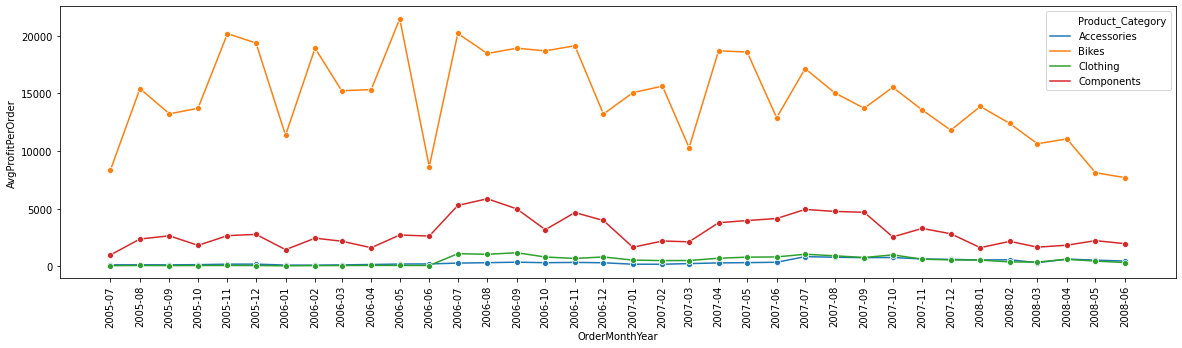

In [20]:
#Ploting metrics grouped by Product Category
plt.figure(figsize=(20,5))
plt.ticklabel_format(style='plain', axis='y')

ax = sns.lineplot(x='OrderDate', 
                   y='AvgProfitPerOrder',
                   hue='Product_Category',
                   marker='o',
                  data=df_monthlyByCategory)

ax.set(xticks=df_monthlyByCategory['OrderDate'].unique())

ax.set_ylabel("AvgProfitPerOrder")    
ax.set_xlabel('OrderMonthYear')

plt.xticks(rotation=90)
myFmt = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(myFmt)
#plt.savefig('/Users/sdas/Downloads/plot.png', dpi=300, bbox_inches='tight')
plt.show()

Product Category - Bike contributed most in terms of Average Profit per Order, but since Aug-2017 the Average Profit per user for bikes have gradually decreased affecting the overall profit

In [21]:
# Analysis on Product Sub Category Level
df_monthlyBySubCategory  = df.groupby(['OrderDate', 'Product_Category', 'Product_Sub_Category']).agg({'Profit': 'sum',
                                                                           'Revenue': 'sum',
                                                                           'Cost': 'sum',
                                                                           'SalesOrderNumber': 'nunique',
                                                                           'OrderQty': 'sum',
                                                                           'Customer_Code': 'nunique',
                                                                           'Sales_Person': 'nunique'}).reset_index()

In [22]:
#For this analysis we concentrate of Product Category Bike, which contributes maximum to the overall profit
df_monthlyBikes = df_monthlyBySubCategory[df_monthlyBySubCategory['Product_Category']=='Bikes'].reset_index(drop=True)
df_monthlyBikes['AvgProfitPerOrder'] = df_monthlyBikes['Profit'] / df_monthlyBikes['SalesOrderNumber']

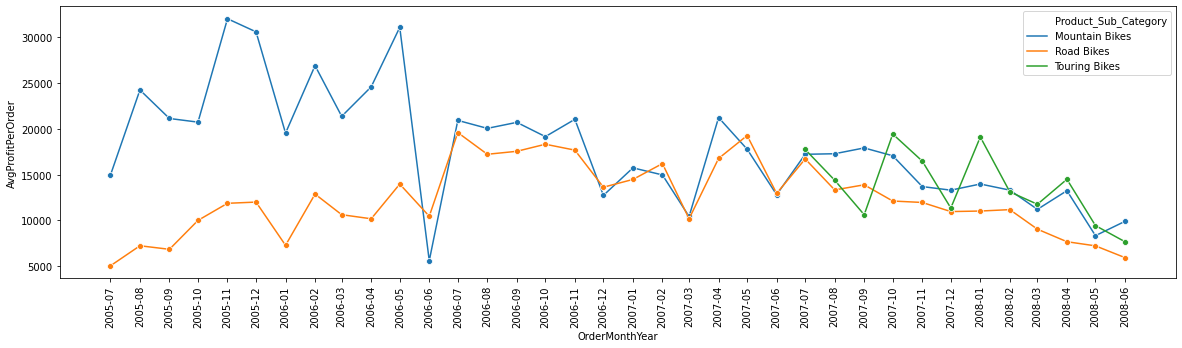

In [23]:
plt.figure(figsize=(20,5))
plt.ticklabel_format(style='plain', axis='y')

ax = sns.lineplot(x='OrderDate', 
                   y='AvgProfitPerOrder',
                   hue='Product_Sub_Category',
                   marker='o',
                  data=df_monthlyBikes)

ax.set(xticks=df_monthlyBikes['OrderDate'].unique())

ax.set_ylabel("AvgProfitPerOrder")    
ax.set_xlabel('OrderMonthYear')

plt.xticks(rotation=90)
myFmt = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(myFmt)
#plt.savefig('/Users/sdas/Downloads/plot.png', dpi=300, bbox_inches='tight')
plt.show()

On further deep dive analysis on Product Category - Bike we see that in recent months there is gradual & constant dip in avg profit per order in case of Road Bikes. For Mountain Bikes & Touring Bikes the avg profit per order also decreased but the decrease is not constant and we see some peaks where the avg profit per order showed improvement again hinting towards a seasonality effect


### Appendix

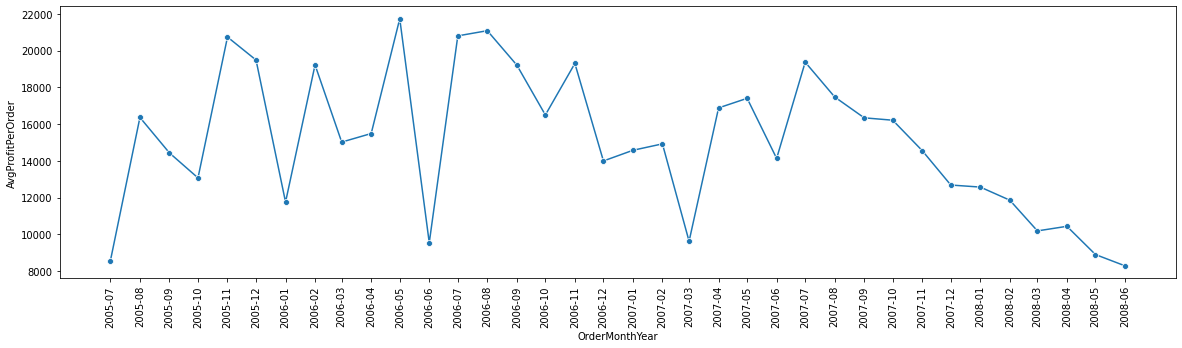

In [24]:
plt.figure(figsize=(20,5))
plt.ticklabel_format(style='plain', axis='y')

ax = sns.lineplot(x='OrderDate', 
                   y='AvgProfitPerOrder',
                  marker='o',
                   data=df_monthly)

ax.set(xticks=df_monthly['OrderDate'].unique())

ax.set_ylabel('AvgProfitPerOrder')    
ax.set_xlabel('OrderMonthYear')

plt.xticks(rotation=90)
myFmt = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(myFmt)
#plt.savefig('/Users/sdas/Downloads/plot.png', dpi=300, bbox_inches='tight')

plt.show()

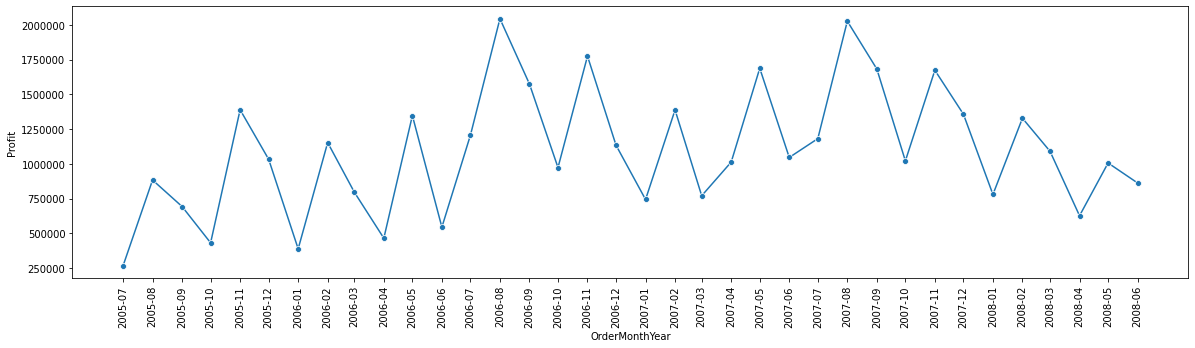

In [25]:
plt.figure(figsize=(20,5))
plt.ticklabel_format(style='plain', axis='y')

ax = sns.lineplot(x='OrderDate', 
                   y='Profit',
                  marker='o',
                   data=df_monthly)

ax.set(xticks=df_monthly['OrderDate'].unique())

ax.set_ylabel('Profit')    
ax.set_xlabel('OrderMonthYear')

plt.xticks(rotation=90)
myFmt = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(myFmt)
#plt.savefig('/Users/sdas/Downloads/plot.png', dpi=300, bbox_inches='tight')

plt.show()